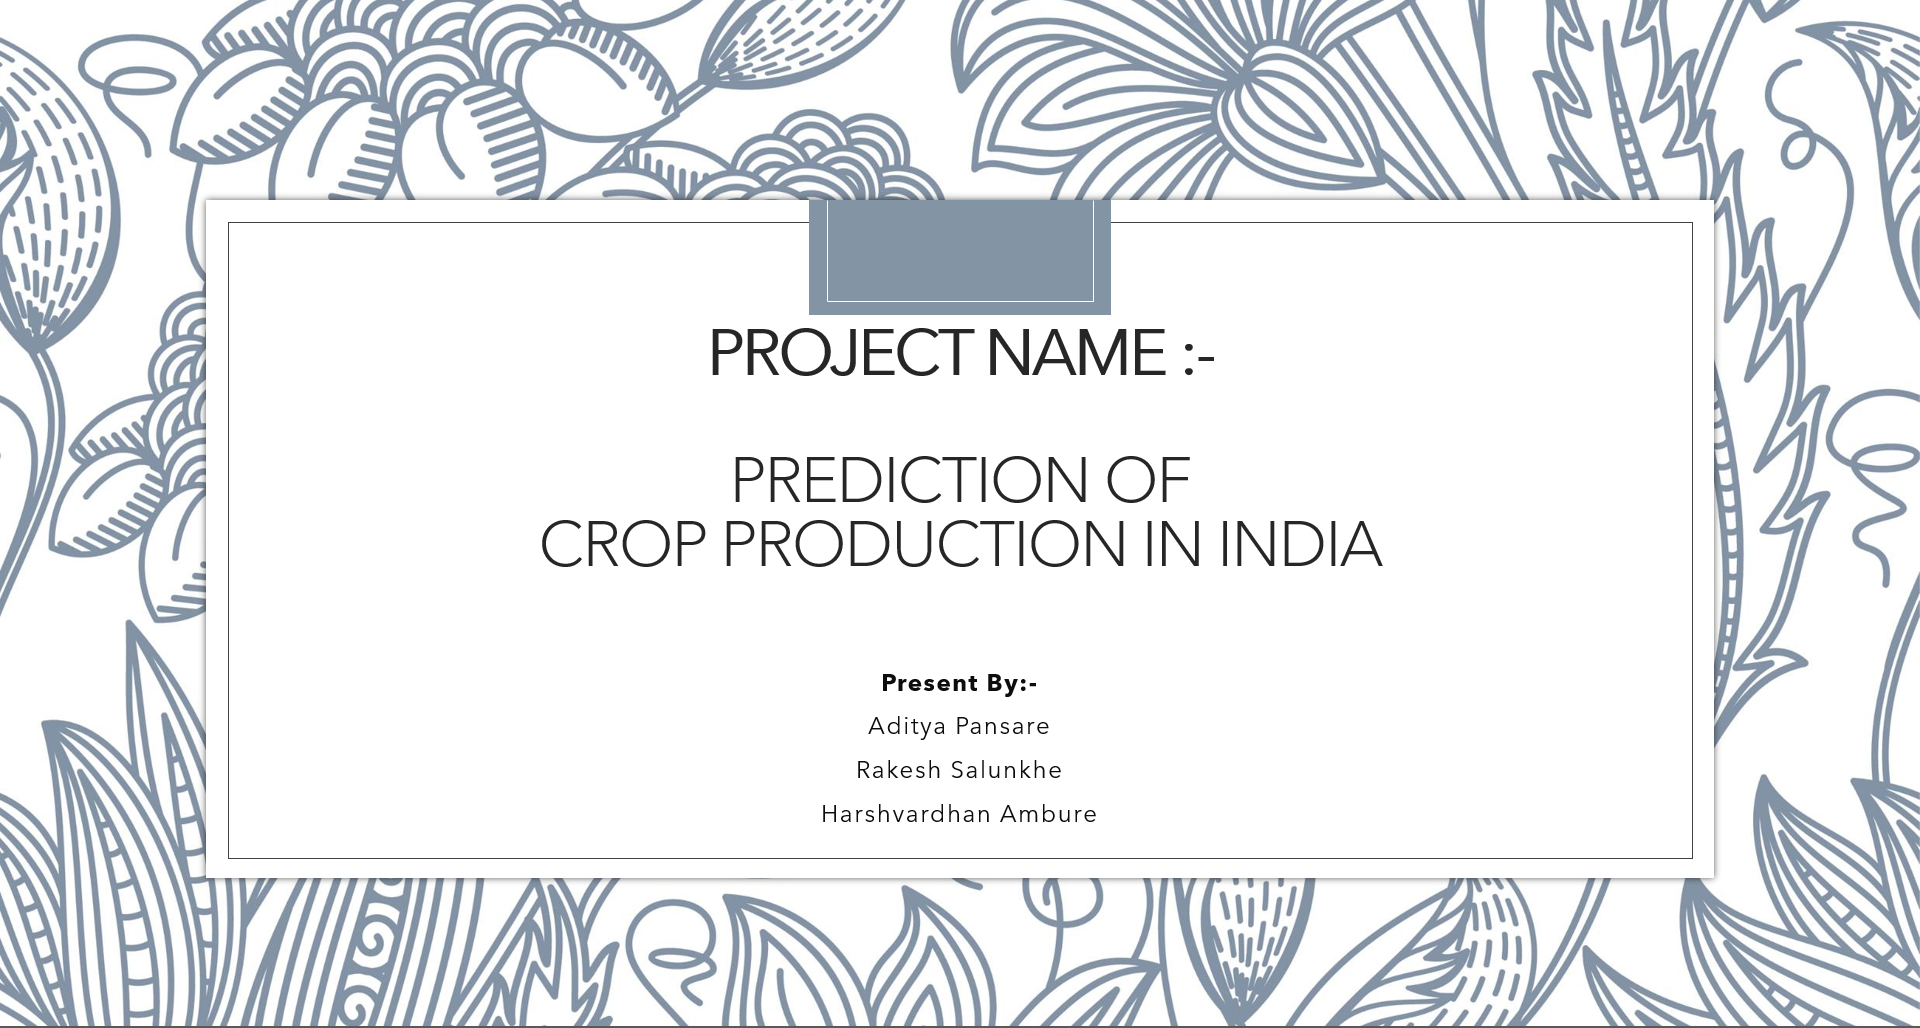

# Project Background

Agriculture is the mainstay of a developing economy like India. Majority of its population depends on
agriculture for their income. With depleting resources, reducing land sizes and increase in input and labor costs,
combined with the uncertainty of various factors like weather, market prices etc, agriculture in India has become a
profession which is full of risks. The advancements in technology must be worked upon across various disciplines and
it has already shown dramatic improvements in many fields. However, agriculture has not benefitted much from such
advancements. Smart farming is the need of the hour of the Indian economy. Machine learning is an imminent field of
computer science which can be applied to the farming sector quite effectively. It can facilitate the up-gradation of
conventional farming techniques in the most cost-friendly approach. The purpose of this paper is to broaden the
farming horizon by listing and evaluating the different applications of machine learning in Indian agriculture and to
help the farmers advance their work up by many notches.

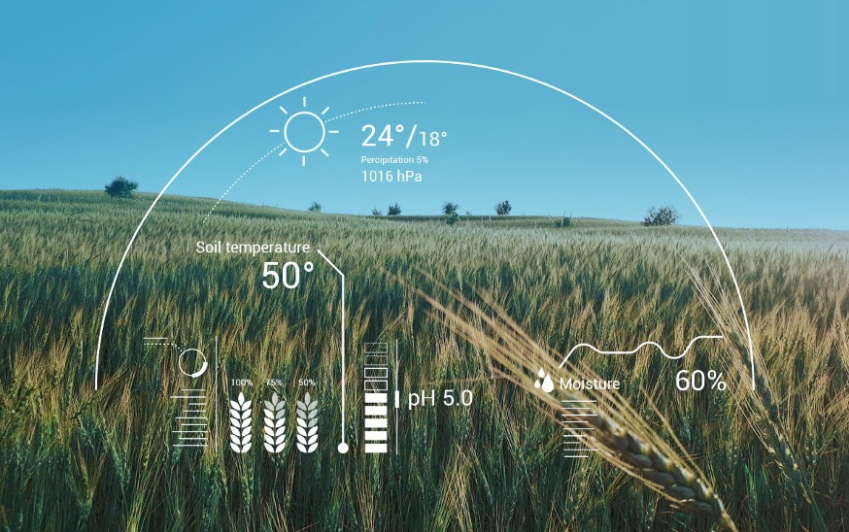

# Project Methodology

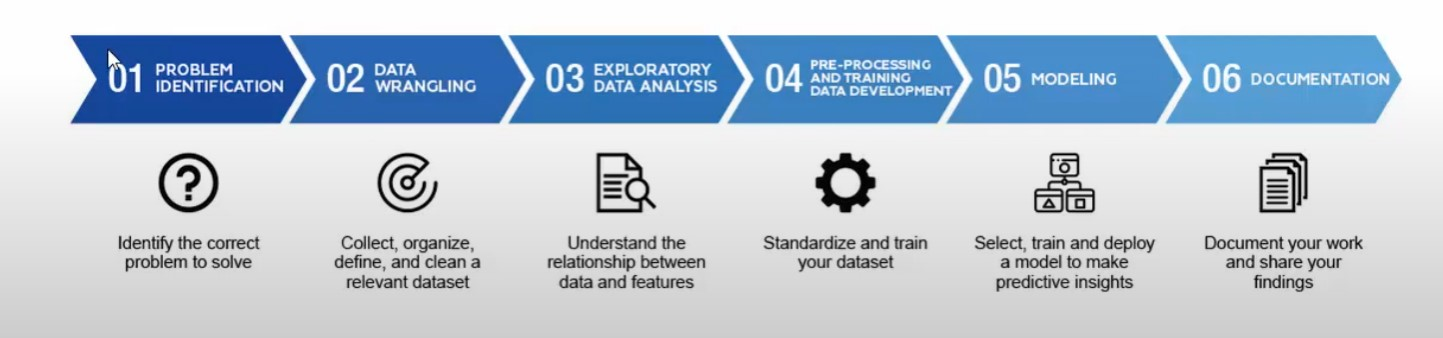

#### import the libraries

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import geopython
from geopy.geocoders import ArcGIS
import folium
from statsmodels.stats import weightstats
import scipy.stats as stats


# Data Wrangling

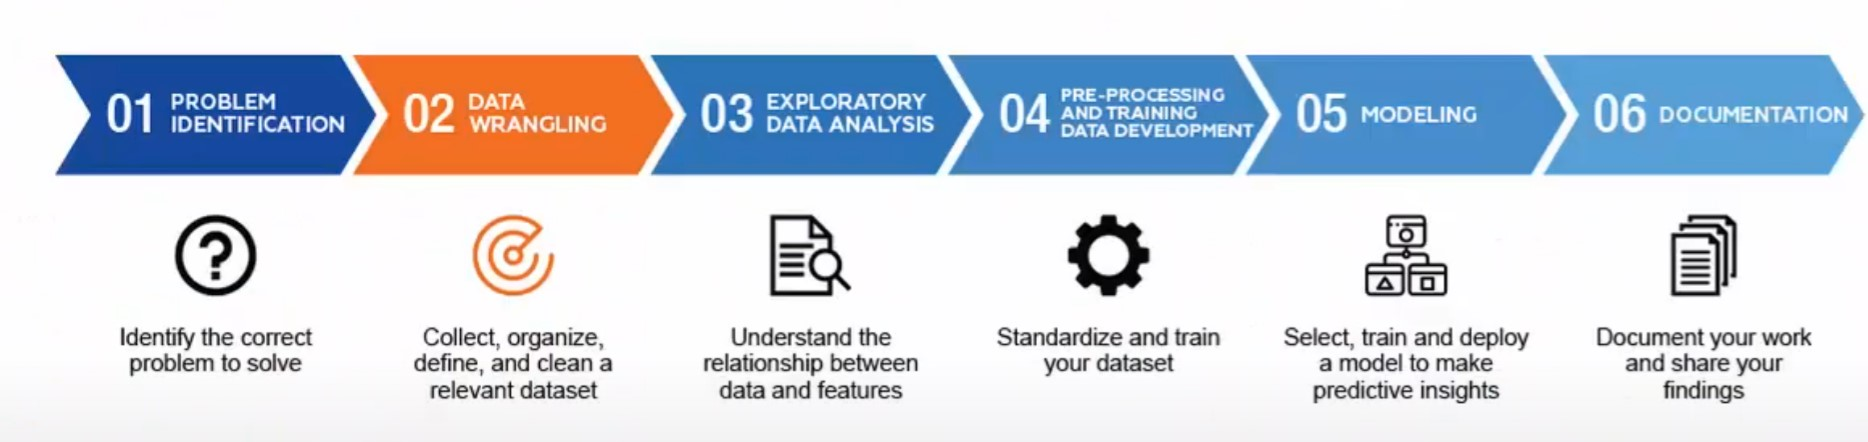

In [66]:
data=pd.read_csv(r"C:\Users\Rakesh Salunkhe\Downloads\crop_production.csv\crop_production.csv")

In [70]:
data

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[246091 rows x 7 columns]

In [71]:
data.shape

(246091, 7)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [73]:
data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [74]:
(3730/data.shape[0])*100

1.5156994770227274

### In this data only 1.5 % of data is nan so we can drop the all the nan values

In [75]:
data=data.dropna()
data

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[242361 rows x 7 columns]

In [76]:
li=['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop']

In [77]:
for i in li:
    print(f"The unique values in the {i}".format(data[i].unique),end="\n")
    print("={}".format(data[i].nunique()))
    print("\n")
    print("That are {}".format(data[i].unique()))
    print("\n")

The unique values in the State_Name
=33


That are ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


The unique values in the District_Name
=646


That are ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAM

In [78]:
# Adding a new column Yield which indicates Production per unit Area. 

data['Yield'] = (data['Production'] / data['Area'])
data.head(10) 

C:\Users\RAKESH~1\AppData\Local\Temp/ipykernel_18852/3849754797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Yield'] = (data['Production'] / data['Area'])


State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
5  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
6  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
7  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
8  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
9  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop     Area  Production        Yield  
0             Arecanut   1254.0      2000.0     1.594896  
1  Other Kharif pulses      2.0         1.0     0.500000  
2                 Rice    102.0       321.0     3.147059  
3               Banana    176.0       641.0     3.642045  
4            Cashewnut    720.0       165.0     0.229167  
5             Coconut   18168.0  65100000.0  3583.223250  
6           Dry ginger     36.0       100.0     2.777778  
7            Sugarcane      1.0         2.0     2.000000  
8         Sweet potato      5.0        15.0     3.000000  
9              Tapioca     40.0       169.0     4.225000

In [79]:
data.describe()

Crop_Year          Area    Production          Yield
count  242361.000000  2.423610e+05  2.423610e+05  242361.000000
mean     2005.625773  1.216741e+04  5.825034e+05      41.649059
std         4.958285  5.085744e+04  1.706581e+07     817.572839
min      1997.000000  1.000000e-01  0.000000e+00       0.000000
25%      2002.000000  8.700000e+01  8.800000e+01       0.513514
50%      2006.000000  6.030000e+02  7.290000e+02       1.000000
75%      2010.000000  4.545000e+03  7.023000e+03       2.355450
max      2015.000000  8.580100e+06  1.250800e+09   88000.000000

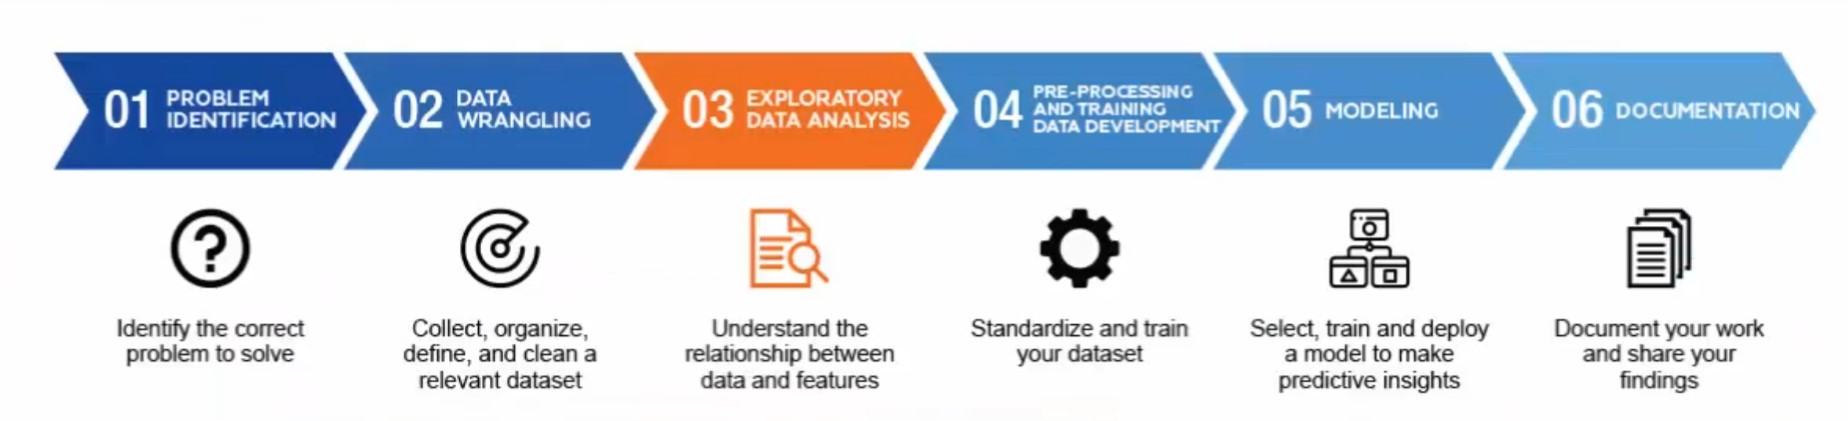

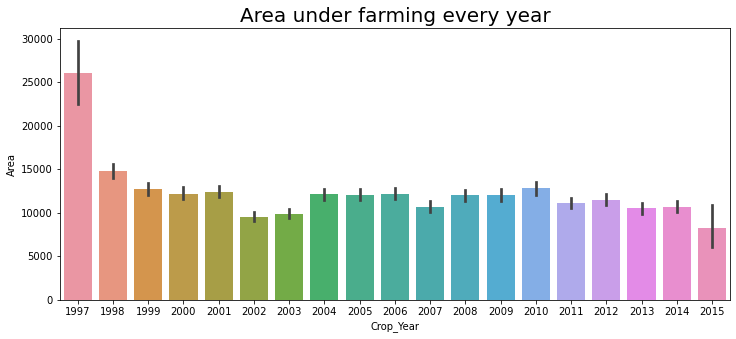

In [80]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x="Crop_Year",y="Area")
plt.title("Area under farming every year",size=20);

Area Under Farming in 1997 was high because India at that period was still an Agricultural Nation. As India Progresses toward an IT-based Nation, the Area for Farming decreases as we can see in the Graph.
This graph shows that in future Area under Farming will be reduce.


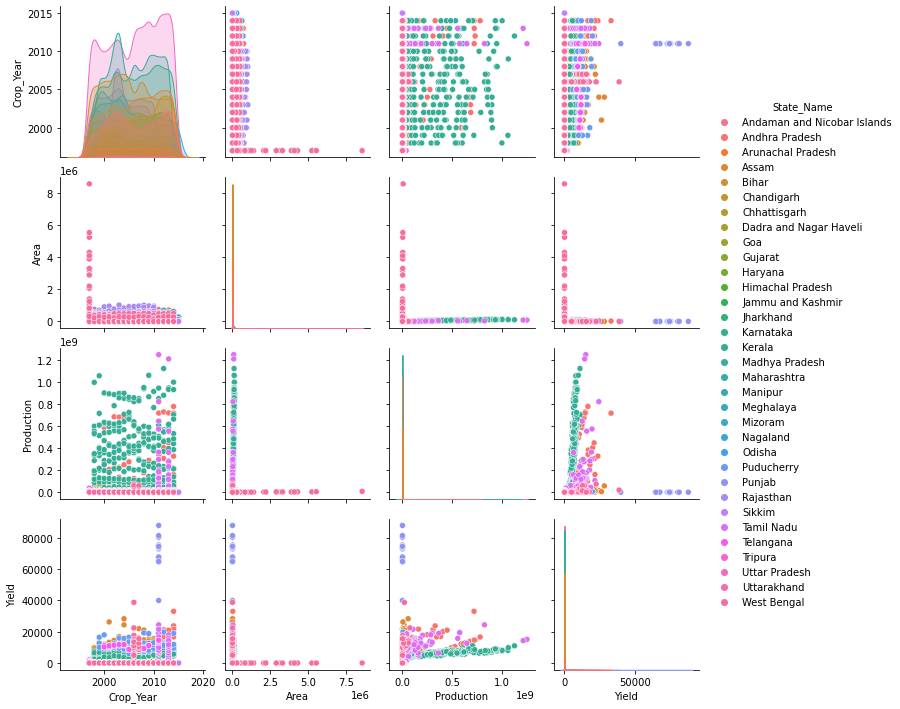

In [81]:
sns.pairplot(data=data,hue="State_Name")

### Graph to show the production of crop every year

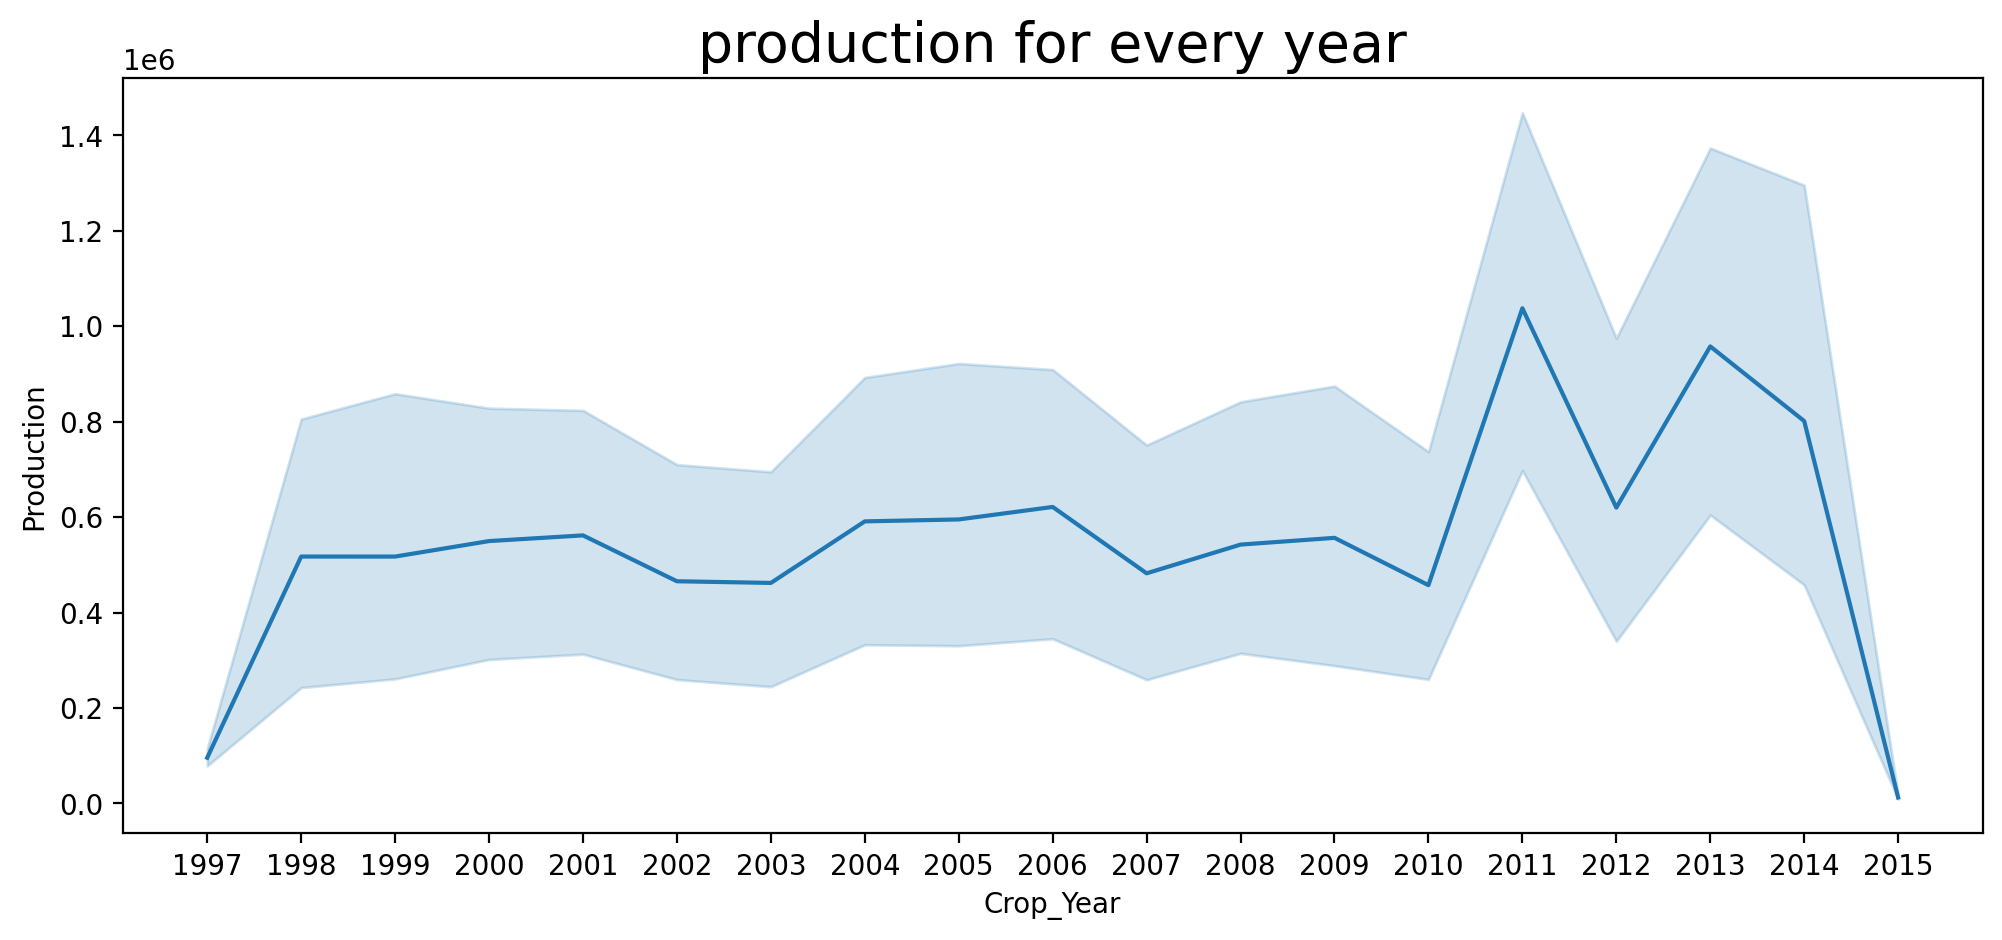

In [82]:
plt.figure(figsize=(12,5),dpi=200)
sns.lineplot(data=data,x="Crop_Year",y="Production")
plt.title("production for every year",size=20)
plt.xticks(data["Crop_Year"].unique());

In [83]:
new_data=data[data.Season !="Whole Year "]

In [84]:
new_data.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2010, 2006, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [85]:
new_data=new_data.sort_values(by="Crop_Year")

In [86]:
new_data.Crop_Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

### Graph to show the production of crop in each season

Text(0.5, 1.0, 'production for each season')

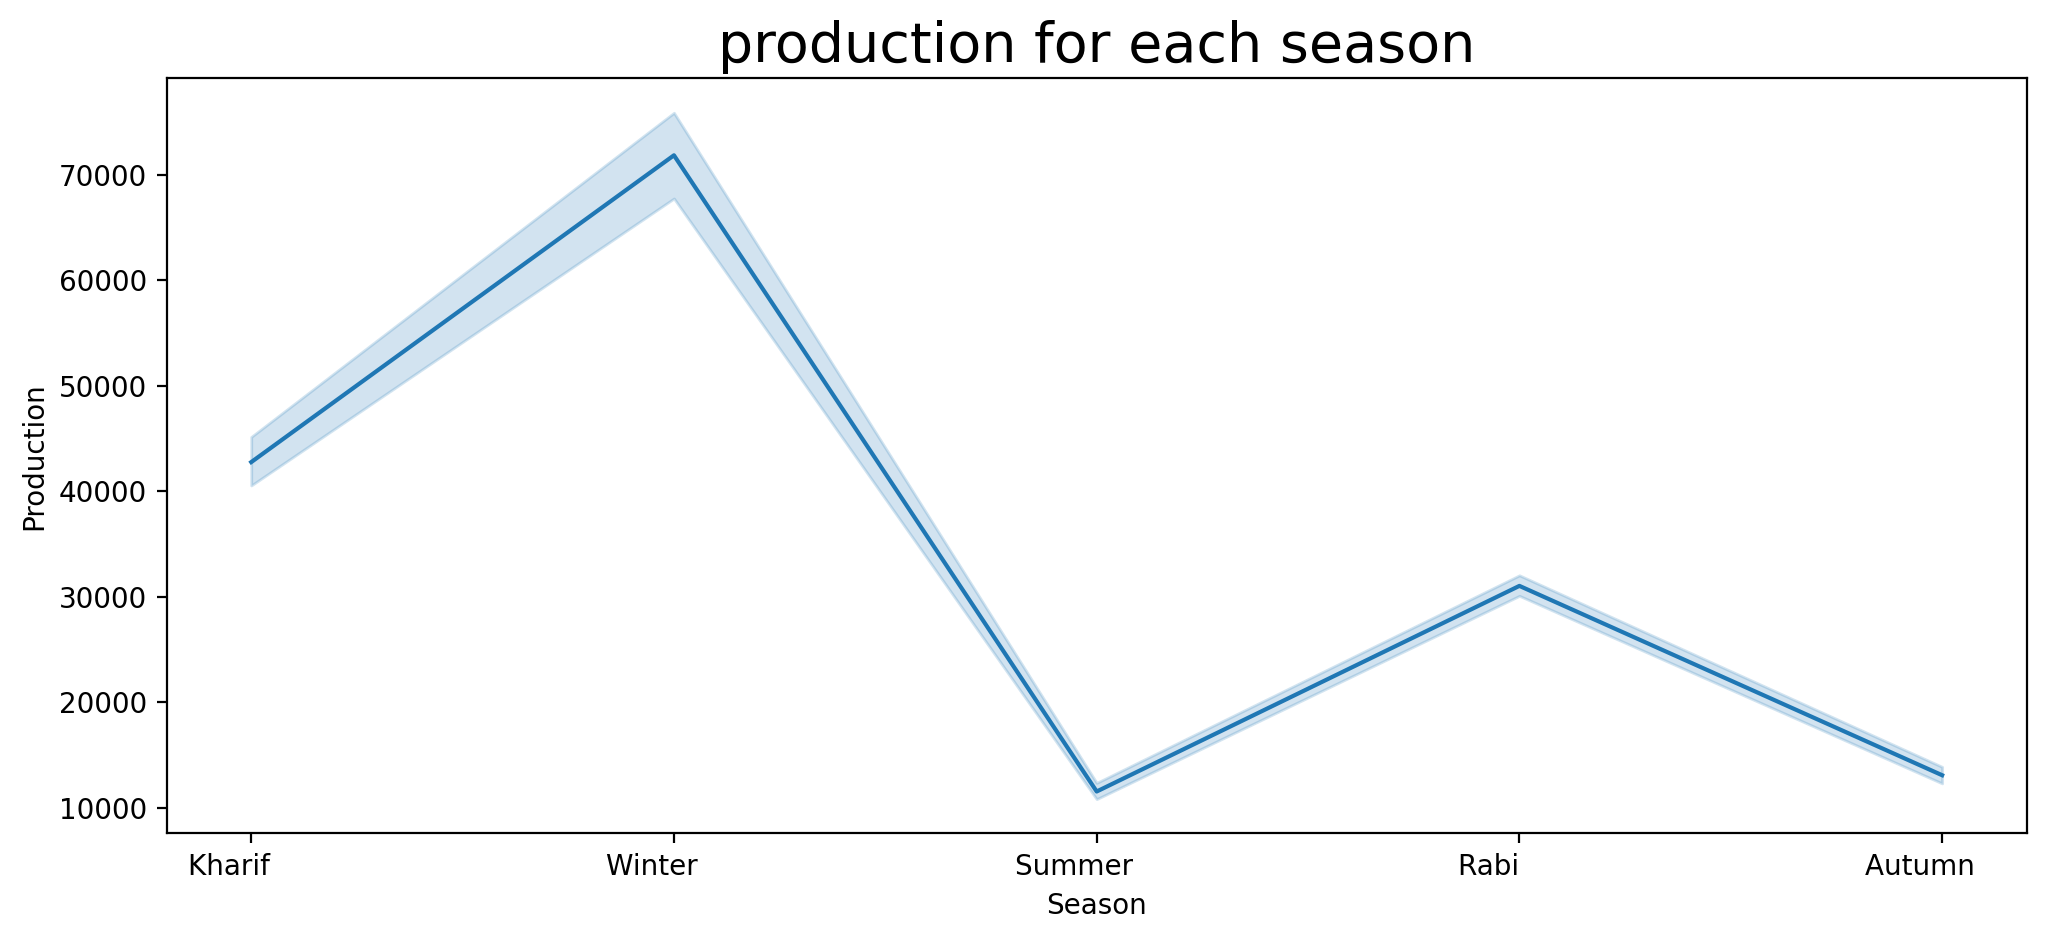

In [87]:
plt.figure(figsize=(12,5),dpi=200)
sns.lineplot(data=new_data,x="Season",y="Production")
plt.title("production for each season",size=20)

### Graph to show the year wise production of crop in every season

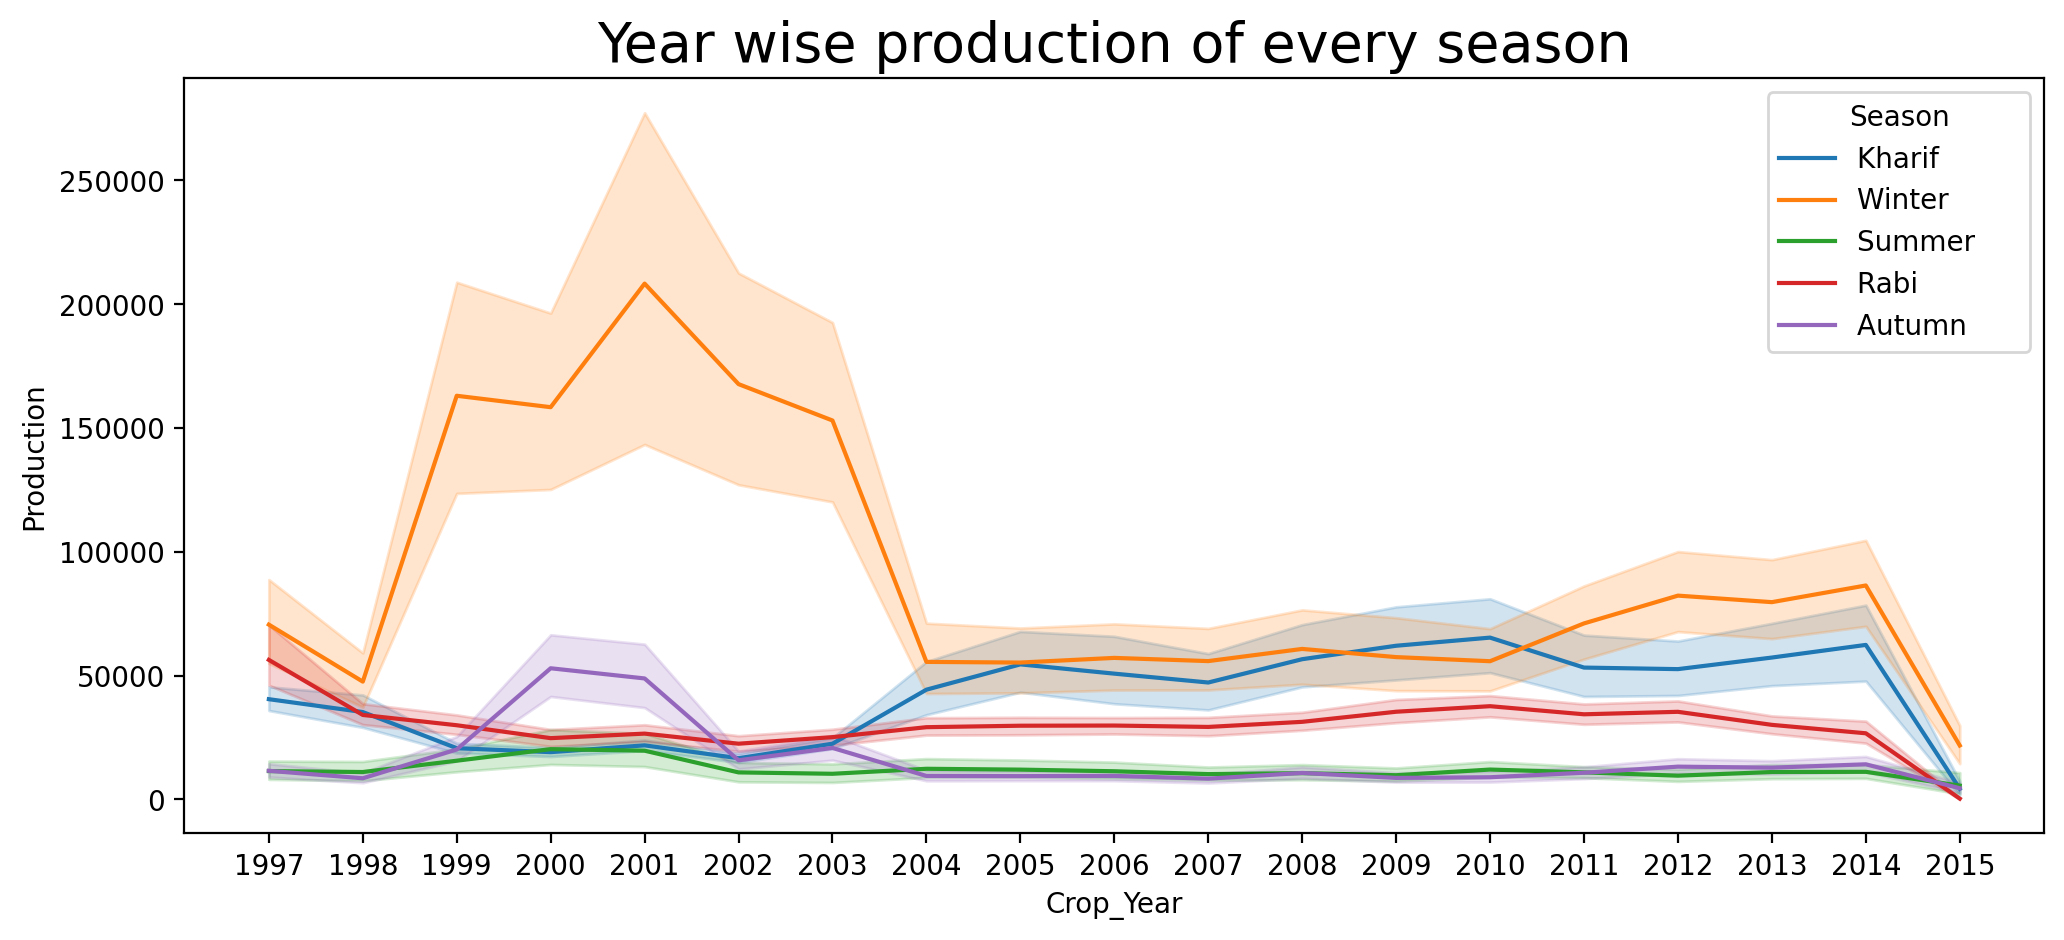

In [88]:
plt.figure(figsize=(12,5),dpi=200)
sns.lineplot(data=new_data,x="Crop_Year",y="Production",hue="Season")
plt.title("Year wise production of every season",size=20)
plt.xticks(new_data["Crop_Year"].unique());

### Graph to show state wise production

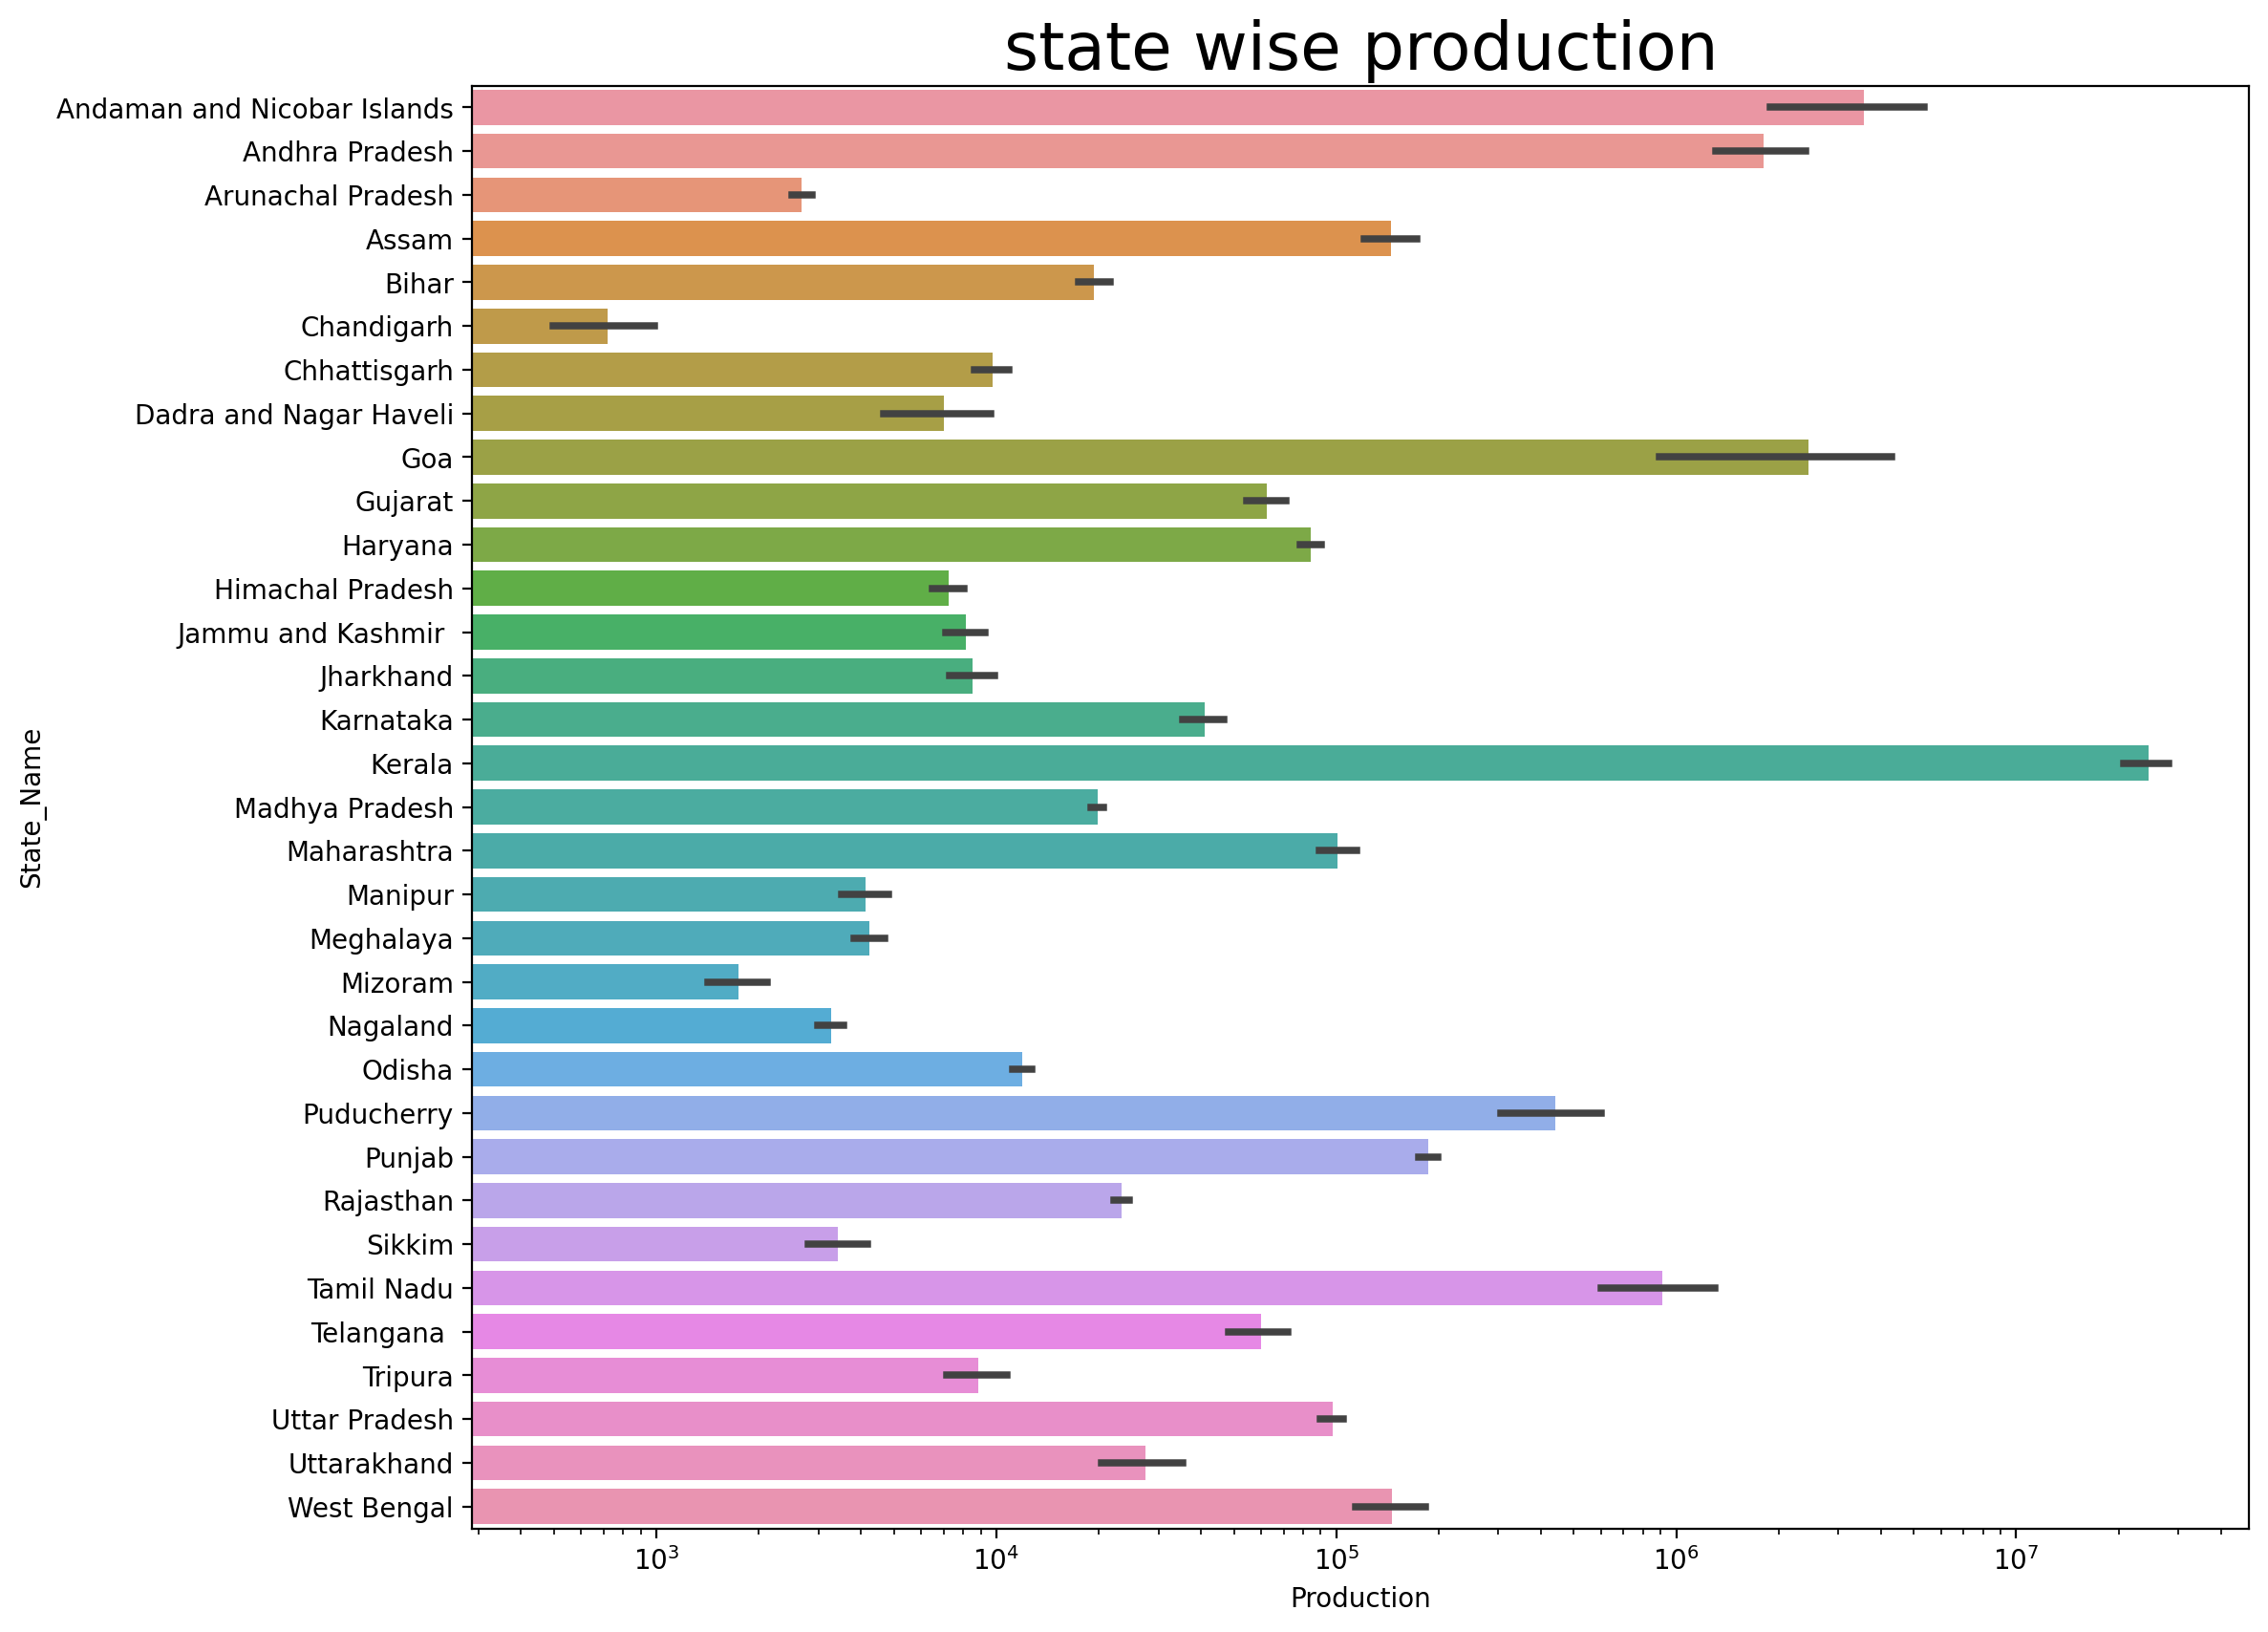

In [89]:
plt.figure(figsize=(12,10),dpi=200)
sns.barplot(x=data['Production'],y= data["State_Name"], orient='h')
plt.title('state wise production',size=25)
plt.xscale('log');

# Geo plot

In [90]:
d=data[data.Crop_Year==2010]
d
c=d.groupby(by=["State_Name"])['Production'].sum()
li=[]


In [91]:
for i in range(0,30):
    da=d.State_Name.unique()[i]
    ca="production for 2010 = {}".format(c[i])
    li.append([da,ca])


In [93]:
nom=ArcGIS()
longitudes =[]
latitudes = []
for i in data.State_Name.unique():
    s=nom.geocode(i)
    longitudes.append(s.longitude)
    latitudes.append(s.latitude)

###  Geoplot for State wise Production in 2010

In [94]:
state_map=folium.Map(location=[9.512300000000039, 77.63271000000003],zoom_start=4.4)
gr=folium.FeatureGroup(naem="State")
for i in range(0,33):
    gr.add_child(folium.Marker(location=[latitudes[i],longitudes[i]],popup=[data.State_Name.unique()[i],li[0][1]],icon=folium.Icon(color="red")))
state_map.add_child(gr)

In [25]:
# Dropping unnecessary columns

co_data = data.drop(['State_Name'], axis = 1)

In [26]:
dummy = pd.get_dummies(co_data)
dummy

Crop_Year      Area  Production      Yield  \
0            2000    1254.0      2000.0   1.594896   
1            2000       2.0         1.0   0.500000   
2            2000     102.0       321.0   3.147059   
3            2000     176.0       641.0   3.642045   
4            2000     720.0       165.0   0.229167   
...           ...       ...         ...        ...   
246086       2014     306.0       801.0   2.617647   
246087       2014     627.0       463.0   0.738437   
246088       2014     324.0     16250.0  50.154321   
246089       2014  279151.0    597899.0   2.141848   
246090       2014     175.0        88.0   0.502857   

        District_Name_24 PARAGANAS NORTH  District_Name_24 PARAGANAS SOUTH  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   
...                                  ...                               ...   
246086                                 0                                 0   
246087                                 0                                 0   
246088                                 0                                 0   
246089                                 0                                 0   
246090                                 0                                 0   

        District_Name_ADILABAD  District_Name_AGAR MALWA  District_Name_AGRA  \
0                            0                         0                   0   
1                            0                         0                   0   
2                            0                         0                   0   
3                            0                         0                   0   
4                            0                         0                   0   
...                        ...                       ...                 ...   
246086                       0                         0                   0   
246087                       0                         0                   0   
246088                       0                         0                   0   
246089                       0                         0                   0   
246090                       0                         0                   0   

        District_Name_AHMADABAD  ...  Crop_Turmeric  Crop_Turnip  Crop_Urad  \
0                             0  ...              0            0          0   
1                             0  ...              0            0          0   
2                             0  ...              0            0          0   
3                             0  ...              0            0          0   
4                             0  ...              0            0          0   
...                         ...  ...            ...          ...        ...   
246086                        0  ...              0            0          0   
246087                        0  ...              0            0          0   
246088                        0  ...              0            0          0   
246089                        0  ...              0            0          0   
246090                        0  ...              0            0          0   

        Crop_Varagu  Crop_Water Melon  Crop_Wheat  Crop_Yam  \
0                 0                 0           0         0   
1                 0                 0           0         0   
2                 0                 0           0         0   
3                 0                 0           0         0   
4                 0                 0           0         0   
...             ...               ...         ...       ...   
246086            0                 0           0         0   
246087  

<function matplotlib.pyplot.show(close=None, block=None)>

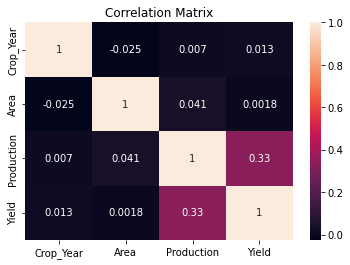

In [27]:
sns.heatmap(co_data.corr(), annot =True)
plt.title('Correlation Matrix')
plt.show

# ANOVA Test

In [28]:
data.groupby(by=["State_Name","Production"]).mean()
mp={}
name=[]
for i in data["State_Name"].unique():
    val="{}".format(i)
    name.append(val)
    mp[val]=data[data["State_Name"]==i].Production

for i in mp.keys():
    print("mp['{}']".format(i),end=",")
anova_test=stats.f_oneway(mp['Andaman and Nicobar Islands'],mp['Andhra Pradesh'],mp['Arunachal Pradesh'],mp['Assam'],mp['Bihar'],mp['Chandigarh'],mp['Chhattisgarh'],mp['Dadra and Nagar Haveli'],mp['Goa'],mp['Gujarat'],mp['Haryana'],mp['Himachal Pradesh'],mp['Jammu and Kashmir '],mp['Jharkhand'],mp['Karnataka'],mp['Kerala'],mp['Madhya Pradesh'],mp['Maharashtra'],mp['Manipur'],mp['Meghalaya'],mp['Mizoram'],mp['Nagaland'],mp['Odisha'],mp['Puducherry'],mp['Punjab'],mp['Rajasthan'],mp['Sikkim'],mp['Tamil Nadu'],mp['Telangana '],mp['Tripura'],mp['Uttar Pradesh'],mp['Uttarakhand'],mp['West Bengal'])


mp['Andaman and Nicobar Islands'],mp['Andhra Pradesh'],mp['Arunachal Pradesh'],mp['Assam'],mp['Bihar'],mp['Chandigarh'],mp['Chhattisgarh'],mp['Dadra and Nagar Haveli'],mp['Goa'],mp['Gujarat'],mp['Haryana'],mp['Himachal Pradesh'],mp['Jammu and Kashmir '],mp['Jharkhand'],mp['Karnataka'],mp['Kerala'],mp['Madhya Pradesh'],mp['Maharashtra'],mp['Manipur'],mp['Meghalaya'],mp['Mizoram'],mp['Nagaland'],mp['Odisha'],mp['Puducherry'],mp['Punjab'],mp['Rajasthan'],mp['Sikkim'],mp['Tamil Nadu'],mp['Telangana '],mp['Tripura'],mp['Uttar Pradesh'],mp['Uttarakhand'],mp['West Bengal'],

In [29]:
if(anova_test[1] < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Accept NUll Hypothesis")

Reject Null Hypothesis


# Interpritation: We can clearly see that H0 is Rejected here.
## we can conclude that there is significant difference in mean.

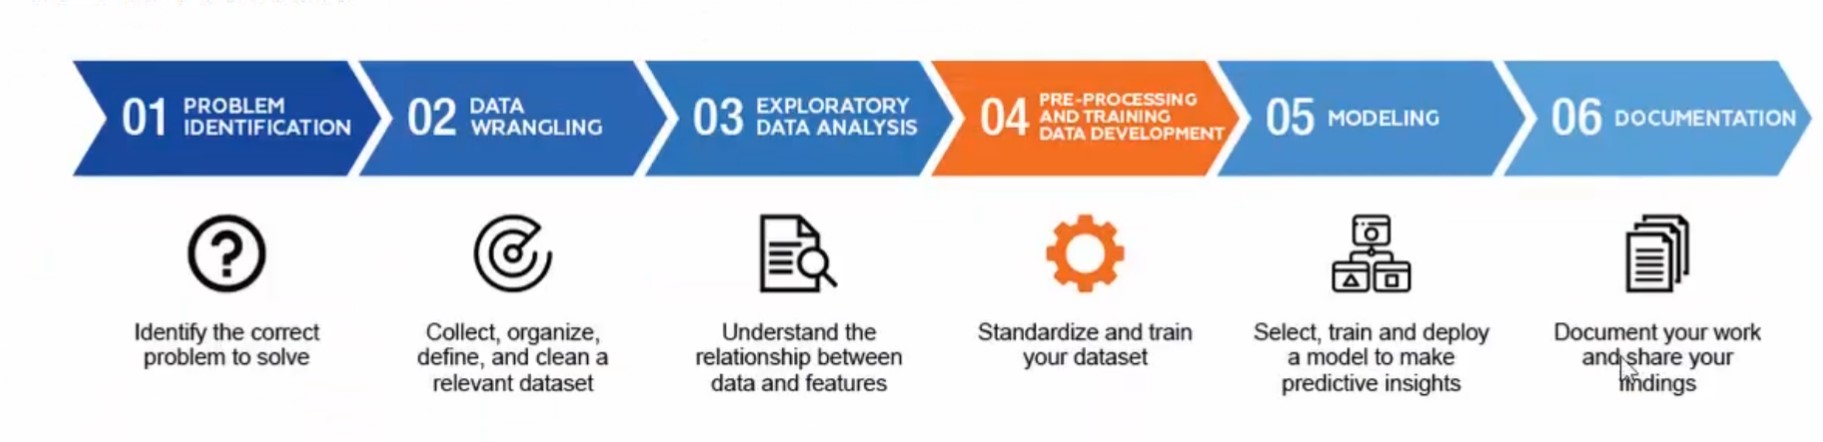

In [30]:
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 778)
x_test : (60591, 778)
y_train : (181770,)
y_test : (60591,)


In [31]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

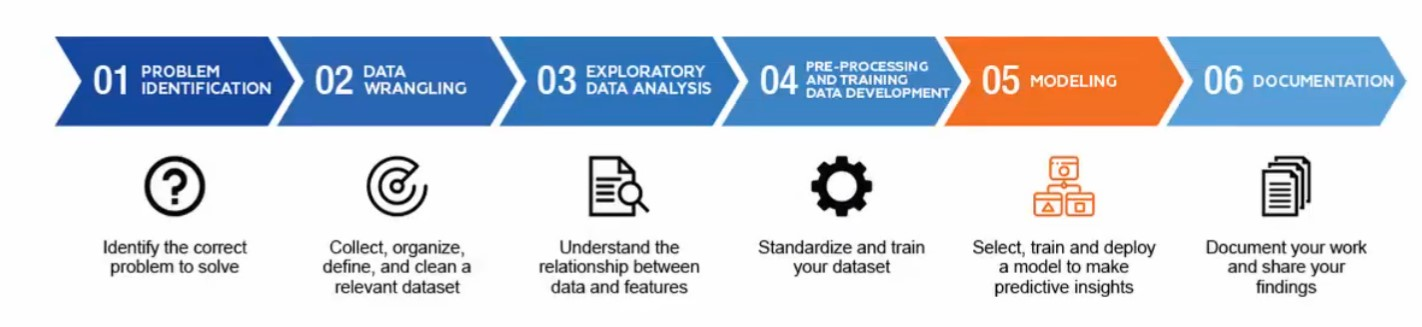

# Linear Regression

In [32]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([-4.11142720e+18,  1.45118318e+18,  6.82913492e+17, ...,
       -2.40490590e+18,  1.16426923e+18, -2.66242954e+18])

In [34]:
model.score(x_test,y_test)

-1.0708020526897362e+23

In [35]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  -1.0708020526897362e+23


# Decision Tree

In [36]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([3900., 1100., 1756., ...,  248., 9656.,   22.])

In [37]:
regressor.score(x_test,y_test)

0.9585403357016204

In [38]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9585403357016204


# Random Forest

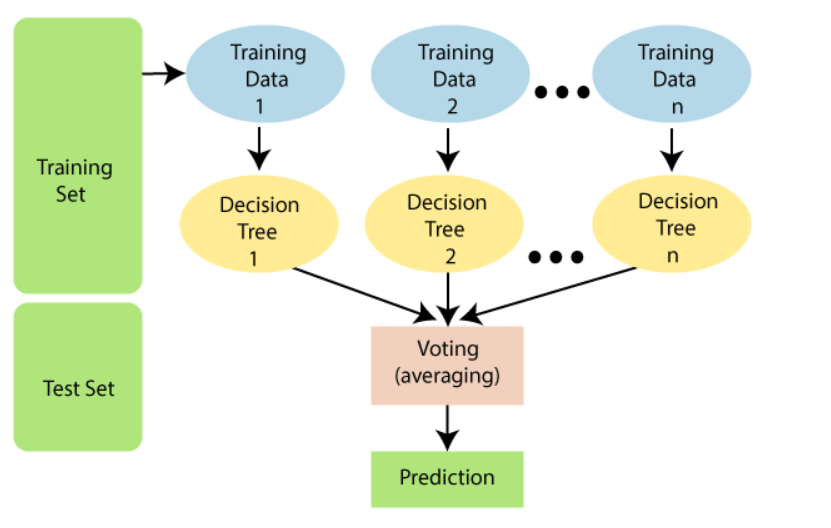

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([ 3702.64545455,   908.45454545,  2188.45454545, ...,
         258.29090909, 10940.72727273,   168.        ])

In [40]:
model.score(x_test,y_test)

0.9620870457381507

In [41]:

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9620870457381507


### Cross validation for random forest

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)
a1 = (accuracies.mean()*100)

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))

Accuracy : 89.06%


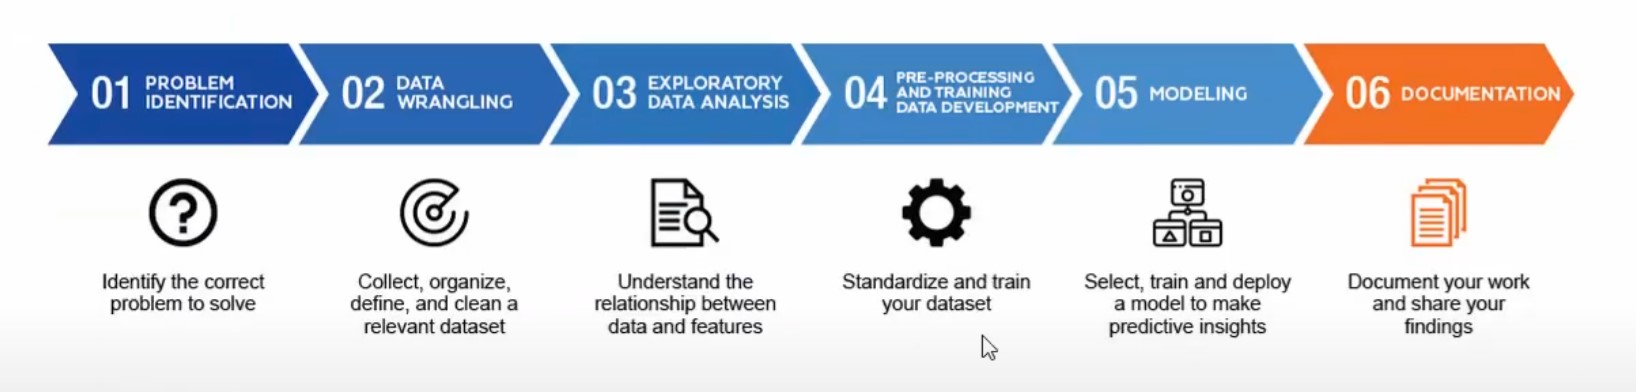

# Conclusion :-

Accuracy of KNN Algorithm is 94%

Accuracy for decision tree is 95%

Accuracy for Random Forest is 96%

### THANK YOU